# CMB Shape Analysis

This notebook enriches CMB metadata with shape and intensity features computed with radiomics

In [1]:
import os
import sys
import argparse
import traceback


import logging
import numpy as np
import  ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
all_meta_path = "../../data-misc/csv/CMB_metadata_all.csv"
csv_metadata_radiomics = "../../data-misc/csv/CMB_radiomics_metadata.csv"

In [3]:
df_cmb_metadata = pd.read_csv(all_meta_path)
df_cmb_metadata_radiomics = pd.read_csv(csv_metadata_radiomics)
df_cmb_metadata_radiomics['CM'] = df_cmb_metadata_radiomics['CM'].apply(lambda x: list(ast.literal_eval(x)))
df_cmb_metadata_radiomics['CM'] = df_cmb_metadata_radiomics['CM'].astype(str)
df_cmb_metadata['CM'] = df_cmb_metadata['CM'].astype(str)
df_cmb_metadata_radiomics.head(2)

/tmp/ipykernel_2484570/2459987675.py:1: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cmb_metadata = pd.read_csv(all_meta_path)


,seriesUID,CM,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,firstorder_Minimum,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,firstorder_RootMeanSquared,firstorder_Skewness,firstorder_TotalEnergy,firstorder_Uniformity,firstorder_Variance,count_dict,com_label
0,RODEJA-00042-CMB-31,"[31, 142, 169]",0.484461,0.410174,2.705284,6.595453,7.071068,3.905125,7.28011,7.433034,...,366.257568,69758.812744,11279.989864,29386.628478,0.441881,3.411117e+10,0.003705,2.674975e+08,"{0.0: 40044044, 3.0: 209, 24.0: 107}",24.0
1,RODEJA-00042-CMB-31,"[37, 183, 145]",0.753416,0.508102,2.211258,4.351997,4.716991,4.716991,5.09902,5.123475,...,250.608276,67652.446411,8579.882629,29635.882352,0.187757,1.339385e+10,0.008600,1.947290e+08,"{0.0: 40044238, 2.0: 110, 3.0: 12}",2.0


In [4]:
df_radiomics = df_cmb_metadata_radiomics
df_radiomics = df_cmb_metadata.merge(df_cmb_metadata_radiomics, on=['seriesUID', 'CM'], how='inner')
df_radiomics.head(2)

,seriesUID,cmb_id,CM,size,radius,processed_id,RB_label,Location,Multiple,<5mm,...,firstorder_Minimum,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,firstorder_RootMeanSquared,firstorder_Skewness,firstorder_TotalEnergy,firstorder_Uniformity,firstorder_Variance,count_dict,com_label
0,RODEJA-00058-CMB-2,0,"[78, 95, 51]",30,1.93,NaN,NaN,NaN,NaN,NaN,...,637.118408,10240.457764,1416.872709,4438.314859,1.213744,7.386990e+07,0.037778,6.635175e+06,"{0.0: 27613410, 7.0: 29, 8.0: 1}",7.0
1,RODEJA-00058-CMB-2,1,"[83, 72, 150]",64,2.48,NaN,NaN,NaN,NaN,NaN,...,69.665451,9432.829666,1796.964899,4288.001944,0.262638,1.470957e+08,0.018555,6.283082e+06,"{0.0: 27613376, 2.0: 40, 3.0: 24}",3.0


In [5]:
df_radiomics.groupby('Dataset').size()

Dataset
CRB       127
DOU        74
MOMENI    146
RODEJA    328
VALDO     248
dtype: int64

# Plots

In [6]:
for col in df_radiomics.columns:
    print(col)

seriesUID
cmb_id
CM
size
radius
processed_id
RB_label
Location
Multiple
<5mm
Cause
Uncertain
Other
seq_type
res_level
field_strength
TE
subject
patientUID
Dataset
shape_Elongation
shape_Flatness
shape_LeastAxisLength
shape_MajorAxisLength
shape_Maximum2DDiameterColumn
shape_Maximum2DDiameterRow
shape_Maximum2DDiameterSlice
shape_Maximum3DDiameter
shape_MeshVolume
shape_MinorAxisLength
shape_Sphericity
shape_SurfaceArea
shape_SurfaceVolumeRatio
shape_VoxelVolume
firstorder_10Percentile
firstorder_90Percentile
firstorder_Energy
firstorder_Entropy
firstorder_InterquartileRange
firstorder_Kurtosis
firstorder_Maximum
firstorder_MeanAbsoluteDeviation
firstorder_Mean
firstorder_Median
firstorder_Minimum
firstorder_Range
firstorder_RobustMeanAbsoluteDeviation
firstorder_RootMeanSquared
firstorder_Skewness
firstorder_TotalEnergy
firstorder_Uniformity
firstorder_Variance
count_dict
com_label


/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

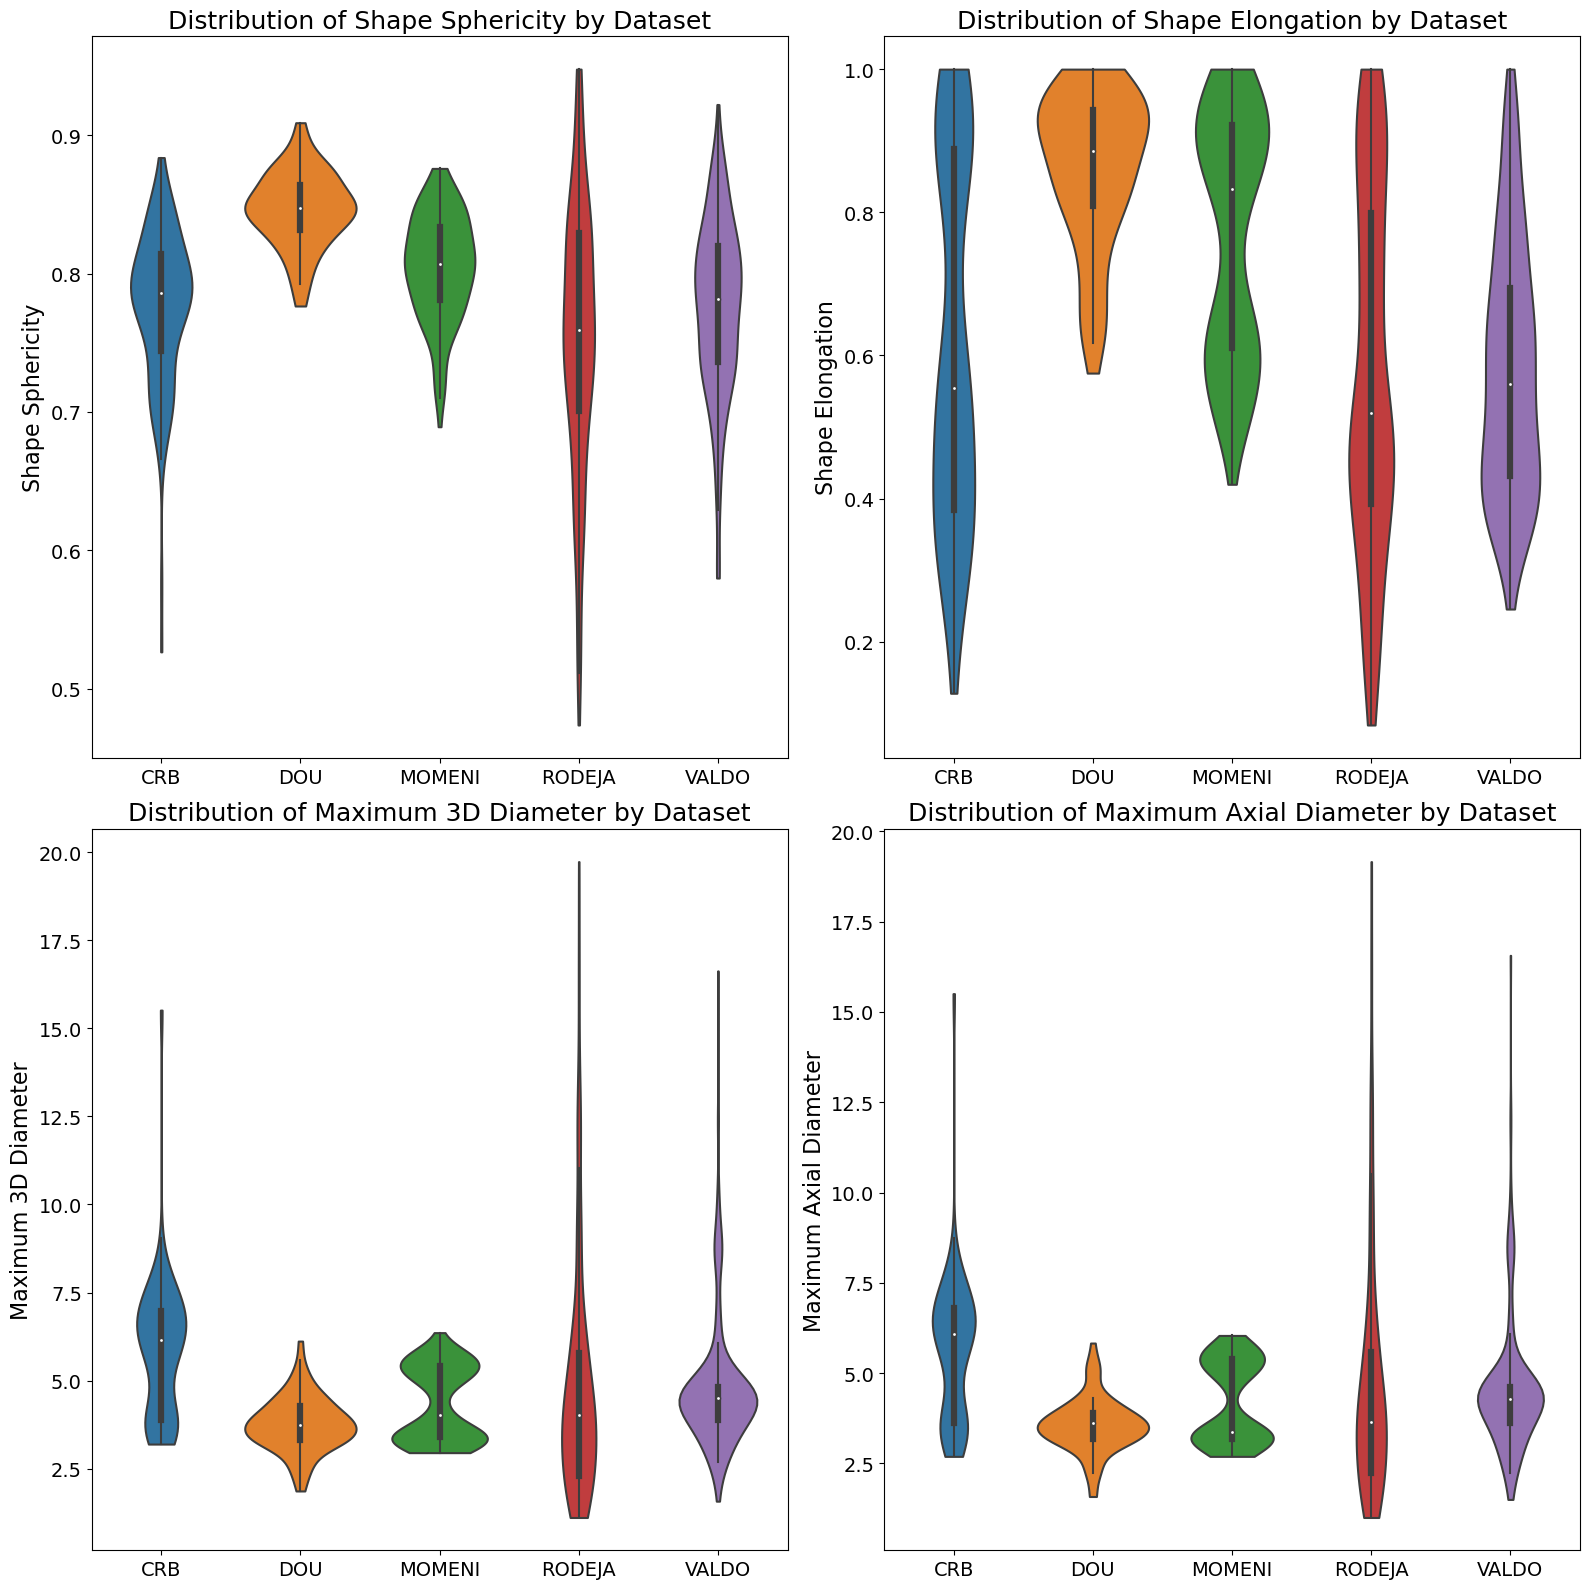

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_violin_plot(ax, data, column, group_by, title, xlabel, ylabel, title_size=16, label_size=14, tick_size=12):
    """
    Creates a violin plot on the specified axes object with customizable font sizes.

    Args:
        ax (matplotlib.axes.Axes): The axes object to draw the violin plot on.
        data (pandas.DataFrame): DataFrame containing the data.
        column (str): Name of the column in DataFrame that contains the values for plotting.
        group_by (str): Column name to group data by.
        title (str): Title of the plot.
        xlabel (str): Label for the X-axis.
        ylabel (str): Label for the Y-axis.
        title_size (int, optional): Font size for the title.
        label_size (int, optional): Font size for the axis labels.
        tick_size (int, optional): Font size for the axis ticks.
    """
    sns.violinplot(x=group_by, y=column, data=data, ax=ax, cut=0)
    ax.set_title(title, fontsize=title_size)
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_size)

# Example usage
fig, axs = plt.subplots(2, 2, figsize=(16, 16))  # Increase the figure size for better visibility

# Plotting each feature
create_violin_plot(
    ax=axs[0, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Sphericity',
    group_by='Dataset',
    title='Distribution of Shape Sphericity by Dataset',
    xlabel='',
    ylabel='Shape Sphericity',
    title_size=18,  # Larger title font
    label_size=16,  # Larger axis label font
    tick_size=14    # Larger tick label font
)

create_violin_plot(
    ax=axs[0, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Elongation',
    group_by='Dataset',
    title='Distribution of Shape Elongation by Dataset',
    xlabel='',
    ylabel='Shape Elongation',
    title_size=18,
    label_size=16,
    tick_size=14
)

create_violin_plot(
    ax=axs[1, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum3DDiameter',
    group_by='Dataset',
    title='Distribution of Maximum 3D Diameter by Dataset',
    xlabel='',
    ylabel='Maximum 3D Diameter',
    title_size=18,
    label_size=16,
    tick_size=14
)

create_violin_plot(
    ax=axs[1, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum2DDiameterSlice',
    group_by='Dataset',
    title='Distribution of Maximum Axial Diameter by Dataset',
    xlabel='',
    ylabel='Maximum Axial Diameter',
    title_size=18,
    label_size=16,
    tick_size=14
)

# Adjust layout and display plot
plt.tight_layout()
plt.savefig("../../data-misc/img/radiomics_features_by_dataset.png")
plt.show()
